# Lab 1 
Chayarob Chantrapiwat 64070501015

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


read `bag.png` image with gray scale

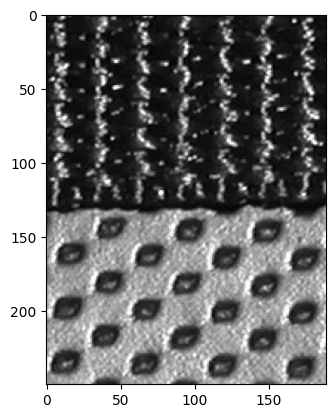

In [4]:
image = cv2.imread('bag.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

In [5]:
image.shape

(250, 189)

set `min` and `max` values of V for a set of intesity values used to define  adjacency and connectivity.

In [6]:
min_v = 0
max_v = 100

crop image, using only bottom part

112 189


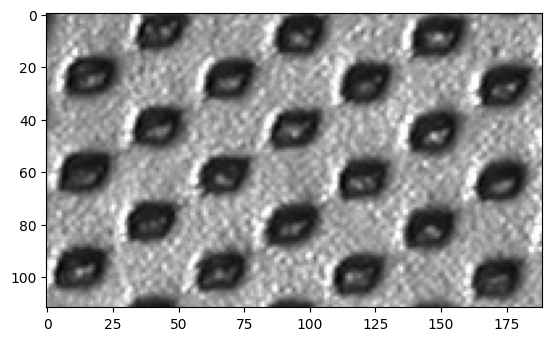

In [7]:
crop_img = image[138:,:]    # Crop image for bottom part
img_height = crop_img.shape[0]    # Get height of cropped image
img_width = crop_img.shape[1]    # Get width of cropped image
print(img_height, img_width)   
plt.imshow(crop_img,cmap='gray')    # Show image

In [8]:
def rgb_offset(r,g,b):
    r = r + 64
    x = r/256
    r = r%256
    
    g = g + 64*x
    y = g/256
    g = g%256
    
    b = b + 64*y
    z = b/256
    b = b%256
    
    return r,g,b

In [9]:
def set_pixel(img, x, y, r,g,b):   
    img[x][y][0] = r
    img[x][y][1] = g
    img[x][y][2] = b
    

## 1. 4-adjacency

In [10]:
# set default value for all pixels
image_4adj = np.stack((crop_img,)*3, axis=-1)    # Convert to 3 channels 
image_4adj[:, :, :] = 255   # Set all pixels to white

In [11]:
image_4adj.shape

(112, 189, 3)

In [12]:
range_4dj = [[0,1],[0,-1],[1,0],[-1,0]]    # Set range for 4 adjacent pixels
r_offset = 0 # Set default value for red offset
g_offset = 0 # Set default value for green offset
b_offset = 0 # Set default value for blue offset
 
queue = []    # Create queue

In [13]:
for i in range(0,img_height):
    for j in range(0,img_width):
        
        # If pixel is in range and not visited
        if crop_img[i,j] in range(min_v,max_v) and (image_4adj[i,j,0] == 255 and image_4adj[i,j,1] == 255 and image_4adj[i,j,2] == 255) :  
            queue.append([i,j]) # Add to queue
            r_offset, g_offset, b_offset = rgb_offset(r_offset,g_offset,b_offset)
            while len(queue) != 0:
                x,y = queue.pop() # Pop position from queue
                set_pixel(image_4adj, x, y, r_offset, g_offset, b_offset)  # Set pixel to color offset
                for k in range_4dj:
                    a = x + k[0]
                    b = y + k[1]
                    
                    if( 
                       a in range(0,img_height) and b in range(0,img_width) and 
                          crop_img[a,b] in range(min_v,max_v) and
                            (image_4adj[a,b,0] == 255 and image_4adj[a,b,1] == 255 and image_4adj[a,b,2] == 255)
                    ):
                        queue.append([a,b]) # Add to queue
                        

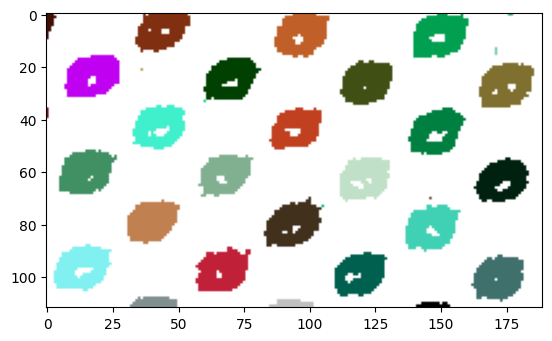

In [14]:
plt.imshow(image_4adj)    # Show image

In [15]:
im_rgb_4adj = cv2.cvtColor(image_4adj, cv2.COLOR_BGR2RGB)
cv2.imwrite('1015_4adj.jpg',im_rgb_4adj)

True

## 2. 8-adjacency

In [16]:
# set default value for all pixels
image_8adj = np.stack((crop_img,)*3, axis=-1)    # Convert to 3 channels 
image_8adj[:, :, :] = 255   # Set all pixels to white

In [17]:
image_8adj.shape

(112, 189, 3)

In [18]:
range_8dj = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[1,-1],[-1,1],[-1,-1]]    # Set range for 8 adjacent pixels
r_offset = 0 # Set default value for red offset
g_offset = 0 # Set default value for green offset
b_offset = 0 # Set default value for blue offset
 
queue = []    # Create queue

In [19]:
for i in range(0,img_height):
    for j in range(0,img_width):
        
        # If pixel is in range and not visited
        if crop_img[i,j] in range(min_v,max_v) and (image_8adj[i,j,0] == 255 and image_8adj[i,j,1] == 255 and image_8adj[i,j,2] == 255) :  
            queue.append([i,j]) # Add to queue
            r_offset, g_offset, b_offset = rgb_offset(r_offset,g_offset,b_offset)
            while len(queue) != 0:
                x,y = queue.pop() # Pop position from queue
                set_pixel(image_8adj, x, y, r_offset, g_offset, b_offset)  # Set pixel to color offset
                for k in range_8dj:
                    a = x + k[0]
                    b = y + k[1]
                    
                    if( 
                       a in range(0,img_height) and b in range(0,img_width) and 
                          crop_img[a,b] in range(min_v,max_v) and
                            (image_8adj[a,b,0] == 255 and image_8adj[a,b,1] == 255 and image_8adj[a,b,2] == 255)
                    ):
                        queue.append([a,b]) # Add to queue
                        

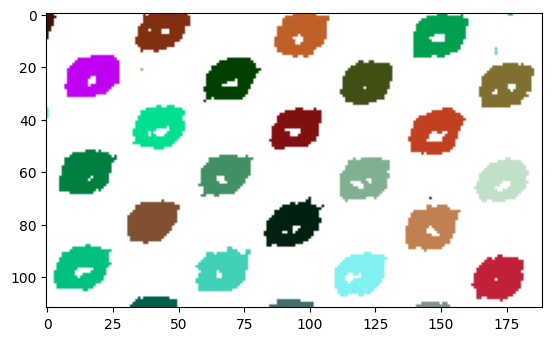

In [20]:
plt.imshow(image_8adj)    # Show image

In [21]:
im_rgb_8adj = cv2.cvtColor(image_8adj, cv2.COLOR_BGR2RGB)
cv2.imwrite('1015_8adj.jpg',im_rgb_8adj)

True

## 3. m-adjacency

In [22]:
# set default value for all pixels
image_madj = np.stack((crop_img,)*3, axis=-1)    # Convert to 3 channels 
image_madj[:, :, :] = 255   # Set all pixels to white

In [23]:
image_madj.shape

(112, 189, 3)

In [24]:
range_4dj = [[0,1],[0,-1],[1,0],[-1,0]]    # Set range for 4 adjacent pixels 
range_diag = [[1,1],[1,-1],[-1,1],[-1,-1]]    # Set range for diagonal adjacent pixels

r_offset = 0 # Set default value for red offset
g_offset = 0 # Set default value for green offset
b_offset = 0 # Set default value for blue offset
 
queue = []    # Create queue

In [25]:
def neighbors_4(img,x,y,min_v,max_v):
    range_4dj = [[0,1],[0,-1],[1,0],[-1,0]]    # Set range for 4 adjacent pixels\
    neighbors = []   # Create list for neighbors
    for k in range_4dj:
        a = x + k[0]
        b = y + k[1]
        if( 
           a in range(0,img_height) and b in range(0,img_width) and 
              img[a,b] in range(min_v,max_v)
        ):
            neighbors.append([a,b]) # Add to neighbors
    return neighbors
    

In [26]:
for i in range(0,img_height):
    for j in range(0,img_width):
        
        # If pixel is in range and not visited
        if crop_img[i,j] in range(min_v,max_v) and (image_madj[i,j,0] == 255 and image_madj[i,j,1] == 255 and image_madj[i,j,2] == 255) :  
            queue.append([i,j]) # Add to queue
            r_offset, g_offset, b_offset = rgb_offset(r_offset,g_offset,b_offset)
            while len(queue) != 0:
                x,y = queue.pop() # Pop position from queue
                set_pixel(image_madj, x, y, r_offset, g_offset, b_offset)  # Set pixel to color offset
                for k in range_4dj:
                    a = x + k[0]
                    b = y + k[1]
                    
                    if( 
                       a in range(0,img_height) and b in range(0,img_width) and 
                          crop_img[a,b] in range(min_v,max_v) and
                            (image_madj[a,b,0] == 255 and image_madj[a,b,1] == 255 and image_madj[a,b,2] == 255)
                    ):
                        queue.append([a,b]) # Add to queue
                        
                for k in range_diag:
                    a = x + k[0]
                    b = y + k[1]
                    
                    if( 
                       a in range(0,img_height) and b in range(0,img_width) and 
                          crop_img[a,b] in range(min_v,max_v) and
                            (image_madj[a,b,0] == 255 and image_madj[a,b,1] == 255 and image_madj[a,b,2] == 255)
                    ):
                        neighbors_a = neighbors_4(crop_img,a,b,min_v,max_v) # Get neighbors of diagonal pixel
                        neighbors_x = neighbors_4(crop_img,x,y,min_v,max_v) # Get neighbors of current pixel
                        
                        common_neighbors = [value for value in neighbors_a if value in neighbors_x] # Find common elements in two lists 
                        if(common_neighbors == []):
                            queue.append([a,b]) # Add to queue
                        

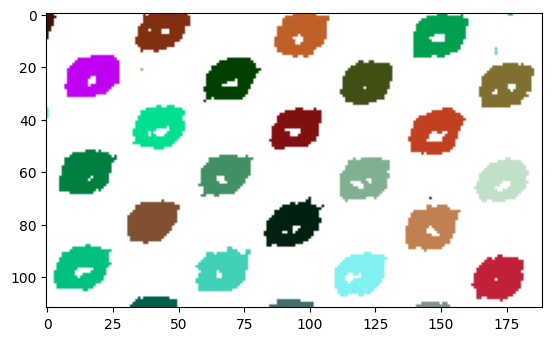

In [27]:
plt.imshow(image_madj)    # Show image

In [28]:
im_rgb_madj = cv2.cvtColor(image_madj, cv2.COLOR_BGR2RGB)
cv2.imwrite('1015_madj.jpg',im_rgb_madj)

True